Daniel Soto Villada $1000534026$

daniel.soto1@udea.edu.co

Fecha: $09/19/2024$

#**Problema:** Dataset de pingüinos

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Cargar el dataset
df = sns.load_dataset('penguins')

##Depuracion del dataframe

In [ ]:
#@title Previsualizacion
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
#@title Identificar cantidad de espacios nulos en cada columna
df.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [ ]:
#@title Informacion en general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
#@title Eliminar filas en las que hay valores nulos
#Depuracion del DataFrame

df.dropna(axis=0, inplace=True, ignore_index=True)

#visualizacion
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
#@title Verificacion de limpieza del df
df.isna().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


##1.
¿Cuántas especies diferentes de pingüinos hay en el dataset?


In [ ]:
#Metodo 1
especies = df["species"].unique()
numeroDeEspecies = len(especies)
print(f"El numero de especies es {numeroDeEspecies}, las cuales son: {', '.join(especies)}")

#Metodo 2
#numeroDeEspecies = len(df.species.unique())

El numero de especies es 3, las cuales son: Adelie, Chinstrap, Gentoo


#2.
¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?

In [ ]:
#Metodo 1

maskAdelie = df["species"] == "Adelie" #Mascara para filtrar por especie "Adelie"
dfAdelie = df[maskAdelie]              #Dataframe de la especie "Adelie"
billLengthAdelie = dfAdelie["bill_length_mm"] #Columna de la longitud del pico
billLengthMeanAdelie = billLengthAdelie.mean()

print(f"La longitud media del pico de los pingüinos Adelie es de {billLengthMeanAdelie:.3f} mm")

#Metodo 2

#df[df["species"] == "Adelie"]["bill_length_mm"].mean()

La longitud media del pico de los pingüinos Adelie es de 38.824 mm


#3.
¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?


In [ ]:
bodyMassMean = df["body_mass_g"].mean()

print(f"La masa corporal media de los pinguüinos es de {bodyMassMean:.3f} g")

La masa corporal media de los pinguüinos es de 4207.057 g


#4.
¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?

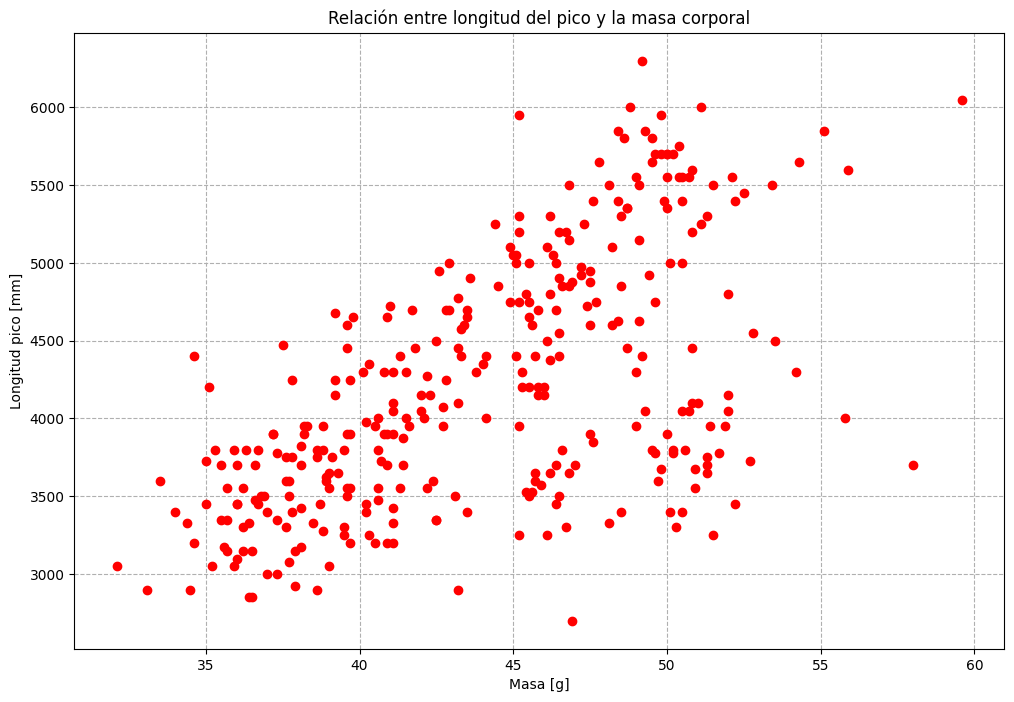

In [ ]:
plt.figure(figsize = (6*2,4*2))
plt.plot(df["bill_length_mm"], df["body_mass_g"], "ro")
plt.title("Relación entre longitud del pico y la masa corporal")
plt.xlabel("Masa [g]")
plt.ylabel("Longitud pico [mm]")
plt.grid(ls="--")

#5.
¿Cuál es la isla con mayor número de pingüinos en el dataset?


In [ ]:
df["island"].value_counts()

,count
island,
Biscoe,163
Dream,123
Torgersen,47


In [ ]:
print(f"La isla con mayor numero de pinguinos es Biscoe")

La isla con mayor numero de pinguinos es Biscoe


#6.
¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?


In [ ]:
maskChinstrap = df["species"] == "Chinstrap"
flipperChinstrapStd = df[maskChinstrap]["flipper_length_mm"].std()
print(f"La desviacion estandar de la longitud de la aleta de los pinguinos Chinstrap es {flipperChinstrapStd:.3f}")

La desviacion estandar de la longitud de la aleta de los pinguinos Chinstrap es 7.132


#7.
¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?


In [ ]:
maskFlipperMax = df["flipper_length_mm"] == df["flipper_length_mm"].max()
print("El pingüino con el pico mas largo pertenece a la especie Gentoo, con id: 276\n")
df[maskFlipperMax]

El pingüino con el pico mas largo pertenece a la especie Gentoo, con id: 276



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
276,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,Male


#8.
¿Cuál es la proporción de machos y hembras en la especie Adelie?


In [ ]:
print(f"La relación entre mahcos y hembras de la espcie Adelie es: 73/73 = {73/73}")
print("Se tiene la misma cantidad de machos y hembras en los datos de la especie Adelie\n")
print(df[maskAdelie]["sex"].value_counts())

La relación entre mahcos y hembras de la espcie Adelie es: 73/73 = 1.0
Se tiene la misma cantidad de machos y hembras en los datos de la especie Adelie

sex
Male      73
Female    73
Name: count, dtype: int64


#9.
¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?


In [ ]:
massAdelie = df[maskAdelie]["body_mass_g"]


billLengthChinstrap = df[maskChinstrap]["bill_length_mm"]
massChinstrap = df[maskChinstrap]["body_mass_g"]

maskGentoo = df["species"] == "Gentoo"
billLengthGentoo = df[maskGentoo]["bill_length_mm"]
massGentoo = df[maskGentoo]["body_mass_g"]

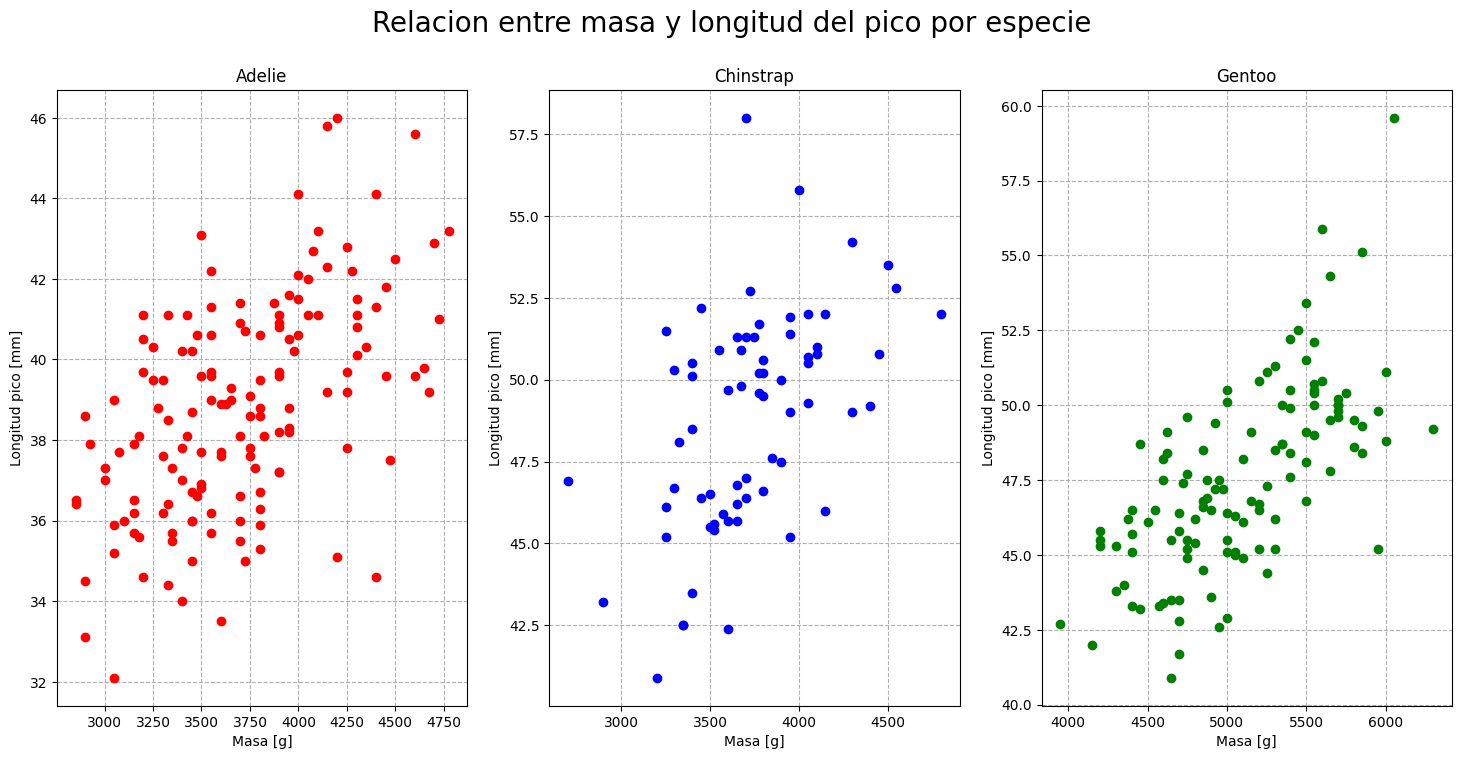

In [ ]:

plt.figure(figsize=(6*3,4*2))
plt.suptitle("Relacion entre masa y longitud del pico por especie", fontsize=20)


plt.subplot(1,3,1)
plt.plot(massAdelie, billLengthAdelie, "ro")
plt.title("Adelie")
plt.xlabel("Masa [g]")
plt.ylabel("Longitud pico [mm]")
plt.grid(ls="--")


plt.subplot(1,3,2)
plt.plot(massChinstrap, billLengthChinstrap, "bo")
plt.title("Chinstrap")
plt.xlabel("Masa [g]")
plt.ylabel("Longitud pico [mm]")
plt.grid(ls="--")


plt.subplot(1,3,3)
plt.plot(massGentoo, billLengthGentoo, "go")
plt.title("Gentoo")
plt.xlabel("Masa [g]")
plt.ylabel("Longitud pico [mm]")
plt.grid(ls="--")

#10.
¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?

Consideremos hacer un BoxPlot para responder a esta pregunta.

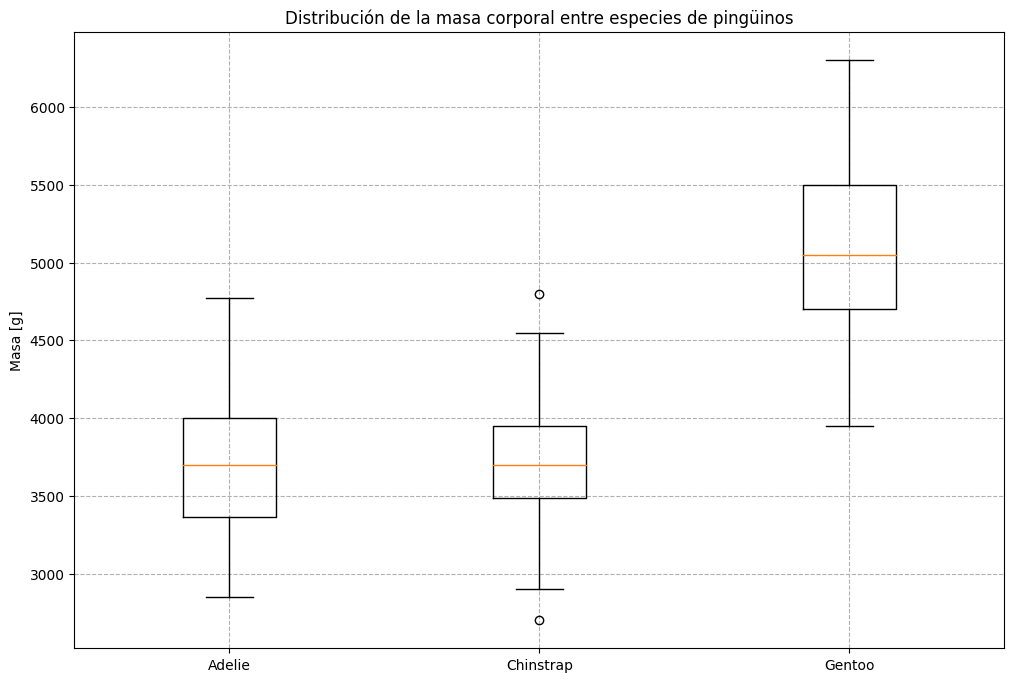

In [ ]:
plt.figure(figsize=(6*2, 4*2))

mass = [massAdelie, massChinstrap, massGentoo]
species = ["Adelie", "Chinstrap", "Gentoo"]

plt.boxplot(mass, labels=species)

plt.title("Distribución de la masa corporal entre especies de pingüinos")
plt.ylabel("Masa [g]")
plt.grid(ls="--")

#11.
¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?


In [ ]:
mask = [maskAdelie, maskChinstrap, maskGentoo]

In [ ]:
for i in mask:
    print(f"Aleta maxima de la especie {df[i]['species'].iloc[0]}:\t{df[i]['flipper_length_mm'].max()}")
    print(f"Aleta minima de la especie {df[i]['species'].iloc[0]}:\t{df[i]['flipper_length_mm'].min()}")

Aleta maxima de la especie Adelie:	210.0
Aleta minima de la especie Adelie:	172.0
Aleta maxima de la especie Chinstrap:	212.0
Aleta minima de la especie Chinstrap:	178.0
Aleta maxima de la especie Gentoo:	231.0
Aleta minima de la especie Gentoo:	203.0


#12.
¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?


In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
maskMasa5000 = df["body_mass_g"] > 5000
print(f"La cantidad de pingüinos que tienen masa superior a 5000 gramos es: {len(df[maskMasa5000])}")

La cantidad de pingüinos que tienen masa superior a 5000 gramos es: 61


#13.
¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?


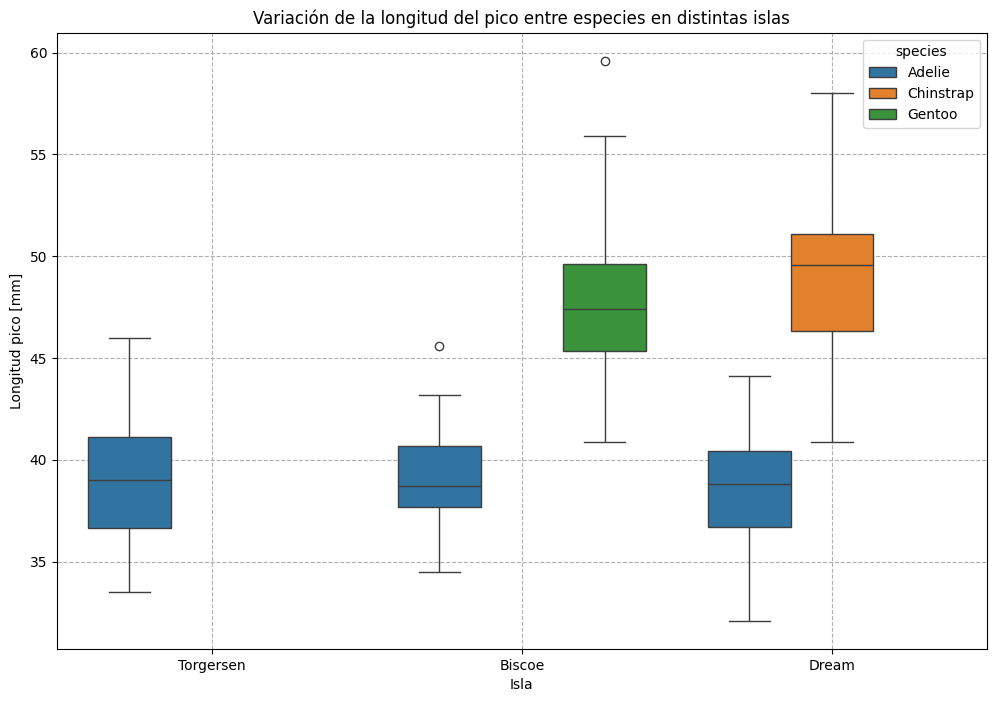

In [ ]:
plt.figure(figsize=(6*2, 4*2))
sns.boxplot(x="island", y="bill_length_mm", hue="species", data=df)

plt.title("Variación de la longitud del pico entre especies en distintas islas")
plt.xlabel("Isla")
plt.ylabel("Longitud pico [mm]")
plt.grid(ls="--")

#14.
¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?

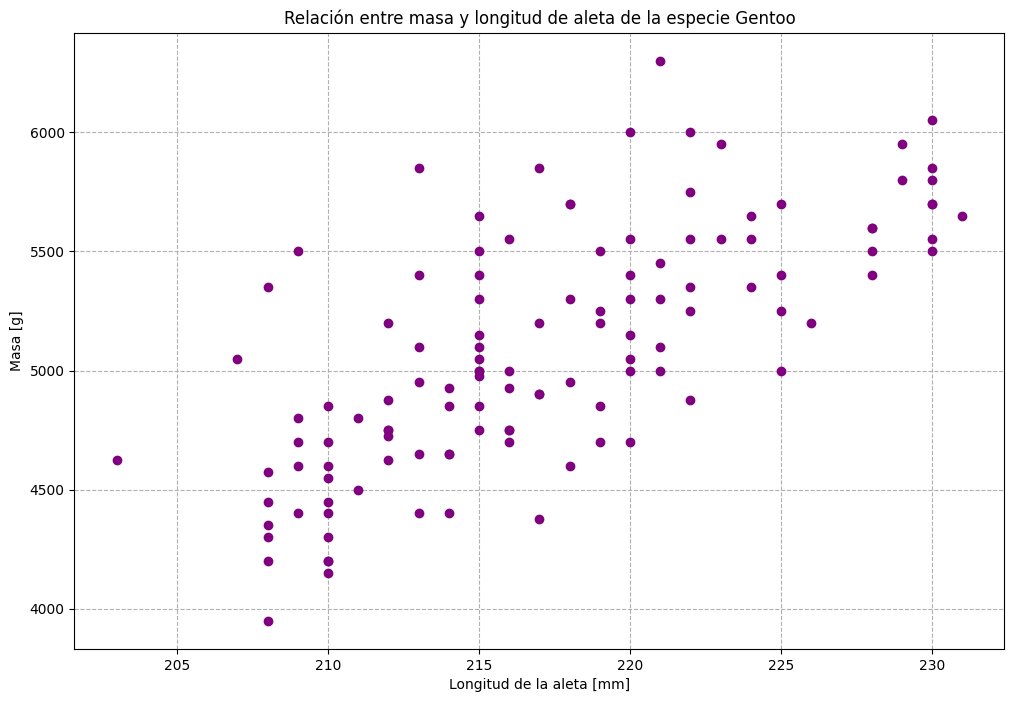

In [ ]:
plt.figure(figsize=(6*2,4*2))

plt.plot(df[maskGentoo]["flipper_length_mm"], df[maskGentoo]["body_mass_g"], "o", color="purple")
plt.title("Relación entre masa y longitud de aleta de la especie Gentoo")
plt.xlabel("Longitud de la aleta [mm]")
plt.ylabel("Masa [g]")
plt.grid(ls="--")

#15.
¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?


In [ ]:
dfSinDepurar = sns.load_dataset('penguins')
print(f"La cantidad es:\t{dfSinDepurar.isna().sum().max()}\n\n")
dfSinDepurar.isna().sum()

La cantidad es:	11




,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


#16.
¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


#17.
¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?


In [ ]:
print(df[maskChinstrap].groupby(["sex"])["body_mass_g"].mean())

sex
Female    3527.205882
Male      3938.970588
Name: body_mass_g, dtype: float64


#18.
¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?


#19.
¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?


#20.
¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?